In [155]:
import pandas as pd 
import pickle
import sklearn
import re
import pickle
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import Model
import numpy as np
from tensorflow import keras
import pydot
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier


In [156]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict1 = pickle.load(fo, encoding='bytes')
    return dict1
pd_tr = pd.DataFrame()
tr_y = pd.DataFrame()
for i in range(1,6):
    data = unpickle('cifar-10-batches-py/data_batch_' + str(i))
    pd_tr = pd_tr.append(pd.DataFrame(data[b'data']))
    tr_y = tr_y.append(pd.DataFrame(data[b'labels']))
    pd_tr['labels'] = tr_y
tr_x = np.asarray(pd_tr.iloc[:, :3072])
tr_y = np.asarray(pd_tr['labels'])
ts_x = np.asarray(unpickle('cifar-10-batches-py/test_batch')[b'data'])
ts_y = np.asarray(unpickle('cifar-10-batches-py/test_batch')[b'labels'])    
labels = unpickle('cifar-10-batches-py/batches.meta')[b'label_names']
def plot_CIFAR(ind):
    arr = tr_x[ind]
    R = arr[0:1024].reshape(32,32)/255.0
    G = arr[1024:2048].reshape(32,32)/255.0
    B = arr[2048:].reshape(32,32)/255.0
    img = np.dstack((R,G,B))
    title = re.sub('[!@#$b]', '', str(labels[tr_y[ind]]))
    fig = plt.figure(figsize=(3,3))
    ax = fig.add_subplot(111)
    ax.imshow(img,interpolation='bicubic')
    ax.set_title('Category = '+ title,fontsize =15)

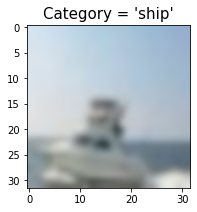

In [157]:
plot_CIFAR(100)

In [158]:
ohe = OneHotEncoder()
ohe.fit(tr_y.reshape(-1,1))
tr_ye = ohe.transform(tr_y.reshape(-1,1))
tr_ya=tr_ye.toarray()
for i in range(len(tr_ya)):
    a=tf.math.argmax(tr_ya[i])
    tr_ya[i][np.array(a)]=1
tr_xa=tf.constant(tr_x)
tr_xa

<tf.Tensor: shape=(50000, 3072), dtype=uint8, numpy=
array([[ 59,  43,  50, ..., 140,  84,  72],
       [154, 126, 105, ..., 139, 142, 144],
       [255, 253, 253, ...,  83,  83,  84],
       ...,
       [ 35,  40,  42, ...,  77,  66,  50],
       [189, 186, 185, ..., 169, 171, 171],
       [229, 236, 234, ..., 173, 162, 161]], dtype=uint8)>

In [179]:
model=keras.Sequential(
[
    layers.Dense(50,activation="relu"),
    layers.Dropout(.2),
    layers.Dense(50,activation="relu"),
    layers.Dropout(.2),
    layers.Dense(10,activation="relu")
])
model.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

In [180]:
op=model.fit(tr_xa,tr_ya, epochs=5, batch_size=100)

Epoch 1/5
500/500 [==============================] - 3s 6ms/step - loss: 1.2169 - accuracy: 0.1006
Epoch 2/5
500/500 [==============================] - 3s 7ms/step - loss: 0.7059 - accuracy: 0.1001
Epoch 3/5
500/500 [==============================] - 4s 8ms/step - loss: 0.6981 - accuracy: 0.1000
Epoch 4/5
500/500 [==============================] - 3s 6ms/step - loss: 0.6967 - accuracy: 0.1001
Epoch 5/5
500/500 [==============================] - 3s 7ms/step - loss: 0.6954 - accuracy: 0.1000


In [164]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
tx,vx,ty,vy=train_test_split(tr_x,tr_y)
LR=LogisticRegression().fit(tx,ty)
print(accuracy_score(vy,LR.predict(vx)))

E:\SiddC\ML_ANN\Anaconda\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.40016
